## Create a linear regression model in Python to predict the CTC/Salary of new hires from the data provided

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Extracting the training data
train_data=pd.read_excel("Data_file.xlsx")
train_data.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [3]:
# dropping unwanted colums
train_data=train_data.drop(['S.No.'], axis = 1)

In [4]:
train_data.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


## - Performing EDA

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   Previous CTC          1338 non-null   int64  
 4   Previous job changes  1338 non-null   int64  
 5   Graduation marks      1338 non-null   int64  
 6   Exp (Months)          1338 non-null   int64  
 7   CTC                   1338 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [6]:
train_data.describe()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,77911.000000,4.000000,85.000000,64.000000,123416.994271


### - Checking for missing values

In [7]:
train_data.isnull().sum()

College                 0
Role                    0
City type               0
Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
CTC                     0
dtype: int64

- Here, we can see that there are no missing values in the data set

### We have 3 categorical variables in the data
        - College
        - Role
        - City type
     We need to convert them into numeric. We will use get_dummies functions

In [8]:
cat_col=['College','Role','City type']

In [9]:
train_data_dummy=pd.get_dummies(train_data,columns=cat_col)
train_data_dummy=train_data_dummy.drop(['College_Tier 3','Role_Executive','City type_Non-Metro'],axis=1)
train_data_dummy.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 1,College_Tier 2,Role_Manager,City type_Metro
0,55523,3,66,19,71406.576531,1,0,1,0
1,57081,1,84,18,68005.870631,0,1,0,1
2,60347,2,52,28,76764.020277,0,1,0,1
3,49010,2,81,33,82092.386880,0,0,0,1
4,57879,4,74,32,73878.097729,0,0,0,1


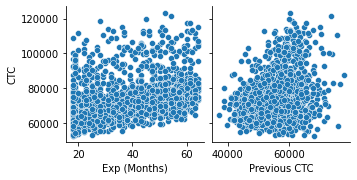

In [10]:
sns.pairplot(data=train_data_dummy,x_vars=['Exp (Months)','Previous CTC'],y_vars='CTC',aspect=1)
plt.show()

In [ ]:
# Here we can observe that the role of Experience and previous CTC is quite significant

### lets define target and dependent variables

In [11]:
y=train_data_dummy[['CTC']]
x=train_data_dummy.drop(columns='CTC')

### Splitting the data into train and test

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=111)
len(x_train),len(x_test),len(y_train),len(y_test)

(936, 402, 936, 402)

### Creating linear model

In [13]:
from sklearn.linear_model import LinearRegression
MLR=LinearRegression()
MLR_model=MLR.fit(x_train,y_train)
MLR_model

LinearRegression()

In [34]:
# Here model MLR_Model is ready

In [36]:
# finding m-value
print("The intercepts values: ", MLR_model.intercept_)
print("The coefficients value: ", MLR_model.coef_)

The intercepts values:  [33607.6868882]
The coefficients value:  [[ 4.26063905e-01 -2.71770468e+01 -2.04141596e+00  2.66320642e+02
   4.50568532e+03 -9.71129566e+02  1.93706925e+04  4.17371278e+03]]


### Predicting the CTC using our trained model

In [15]:
y_test['Predicted CTC']=MLR_model.predict(x_test)
y_test.head()

,CTC,Predicted CTC
1000,70944.167462,84239.278003
53,92378.502641,90349.908490
432,70832.226387,76978.706074
162,83984.481546,82128.329914
1020,81962.819031,81421.458455


## Evaluating the model

In [16]:
r_square=MLR_model.score(x_train,y_train)
print(" The r_squared value is:",r_square)

 The r_squared value is: 0.6045198673537086


### Finding the errors

In [17]:
error=y_test['CTC']-y_test['Predicted CTC']
error.head()

1000   -13295.110541
53       2028.594151
432     -6146.479687
162      1856.151632
1020      541.360576
dtype: float64

In [18]:
error.skew()

0.4016059391277571

### Checking the normality for errors

<AxesSubplot:ylabel='Density'>

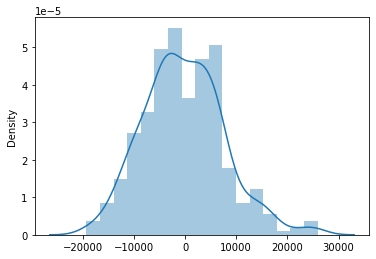

In [19]:
sns.distplot(error)

- Here, we can say that the errors are normality distributed

In [20]:
#calulating sq-error
y_test['sq_error']=error**2
y_test.head()

,CTC,Predicted CTC,sq_error
1000,70944.167462,84239.278003,1.767600e+08
53,92378.502641,90349.908490,4.115194e+06
432,70832.226387,76978.706074,3.777921e+07
162,83984.481546,82128.329914,3.445299e+06
1020,81962.819031,81421.458455,2.930713e+05


In [21]:
# calulating mean error
error_mean=y_test['sq_error'].mean()
error_mean

62268857.23920927

### Finding RMSE value for our model

In [37]:
import math
RMSE=math.sqrt(error_mean)
print("The RMSE value of the model is:",RMSE)

The RMSE value of the model is: 7891.061857520144


### As the model is ready and is evaluated, hence we will go ahead and test it using test data file

### Getting the test data file

In [23]:
test_data=pd.read_excel("Test_data_file.xlsx")
test_data.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.576531,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.870631,NaN
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.020277,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.386880,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.097729,NaN


### Preprocessing

In [24]:
# Renaming the columns as per train data
test_data=test_data.rename(columns={'College_T1':'College_Tier 1','College_T2':'College_Tier 2','City_Metro':'City type_Metro',
                                   'previous CTC':'Previous CTC','previous job changes':'Previous job changes',
                                    'Actual CTC':'CTC','Exp':'Exp (Months)'})

In [25]:
# Dropping unwanted columns and re-arranging
test_data=test_data.drop(columns=['College','Role','City type'], axis=1)
test_data=test_data[['Previous CTC','Previous job changes','Graduation marks','Exp (Months)','CTC','College_Tier 1',
                     'College_Tier 2','Role_Manager','City type_Metro','Predicted CTC']]
test_data.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 1,College_Tier 2,Role_Manager,City type_Metro,Predicted CTC
0,55523,3,66,19,71406.576531,1,0,1,0,NaN
1,57081,1,84,18,68005.870631,0,1,0,1,NaN
2,60347,2,52,28,76764.020277,0,1,0,1,NaN
3,49010,2,81,33,82092.386880,0,0,0,1,NaN
4,57879,4,74,32,73878.097729,0,0,0,1,NaN


### Predicting the values for test data using our trained model

In [27]:
# Creating validation data for prediction
val_data=test_data.drop(columns=['CTC','Predicted CTC'])
val_data.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),College_Tier 1,College_Tier 2,Role_Manager,City type_Metro
0,55523,3,66,19,1,0,1,0
1,57081,1,84,18,0,1,0,1
2,60347,2,52,28,0,1,0,1
3,49010,2,81,33,0,0,0,1
4,57879,4,74,32,0,0,0,1


In [28]:
# Here are the predicted values
test_data['Predicted CTC']=MLR_model.predict(val_data)
test_data['Predicted CTC'].head()

0    85984.238465
1    65725.539410
2    69818.418810
3    67231.664040
4    70704.039984
Name: Predicted CTC, dtype: float64

### Calculating the errors and RMSE values

In [29]:
error=test_data['CTC']-test_data['Predicted CTC']
error.head()

0   -14577.661934
1     2280.331221
2     6945.601467
3    14860.722840
4     3174.057745
dtype: float64

<AxesSubplot:ylabel='Density'>

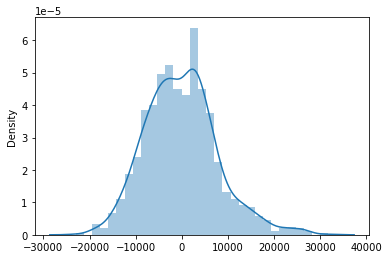

In [30]:
sns.distplot(error)

In [31]:
error.skew()

0.4986355024911615

In [38]:
sqr_error=(error)**2
MSR=sqr_error.mean()
RMSE=math.sqrt(MSR)
print("The RMSE value is:",RMSE)

The RMSE value is: 7856.719136324669


### As we get the RMSE value, lets go ahead and get the range of predicted CTC

In [33]:
test_data['Predicted Upper Range']=test_data['Predicted CTC']+RMSE
test_data['Predicted Lower Range']=test_data['Predicted CTC']-RMSE
test_data.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 1,College_Tier 2,Role_Manager,City type_Metro,Predicted CTC,Predicted Upper Range,Predicted Lower Range
0,55523,3,66,19,71406.576531,1,0,1,0,85984.238465,93840.957601,78127.519328
1,57081,1,84,18,68005.870631,0,1,0,1,65725.539410,73582.258546,57868.820273
2,60347,2,52,28,76764.020277,0,1,0,1,69818.418810,77675.137946,61961.699673
3,49010,2,81,33,82092.386880,0,0,0,1,67231.664040,75088.383176,59374.944903
4,57879,4,74,32,73878.097729,0,0,0,1,70704.039984,78560.759121,62847.320848


### - Here, we can say that the predicted range of CTC could be offered as above